In [34]:
import pandas as pd

In [35]:
# Reload the merged file
file_path = "merged_data.csv"
data = pd.read_csv(file_path)

In [36]:
# Clean the data
data_cleaned = data.dropna(subset=("amount")).copy() # Drop the rows where 'amount' is missing and creates a copy
data_cleaned['status_cash_request'] = data_cleaned["status_cash_request"].fillna("unknown") # Fill missing 'status_cash_request' with 'unknown'

In [37]:
# Convert 'created_at_cash_request' to datetime format
data_cleaned["created_at_cash_request"] = pd.to_datetime(data_cleaned["created_at_cash_request"], errors="coerce").dt.tz_localize(None)

In [38]:
# Creates 'cohort_month' in a new column that contains the year and month when the first cash advance was made
data_cleaned["cohort_month"] = data_cleaned["created_at_cash_request"].dt.to_period("M")

In [39]:
# 1. Calculate the average usage for cohort
cohort_usage = data_cleaned.groupby(["cohort_month", "user_id"]).size().reset_index(name="usage_count")
cohort_frequency = cohort_usage.groupby('cohort_month')['usage_count'].mean().reset_index()
cohort_frequency.columns = ['cohort_month', 'average_usage_per_user']

In [40]:
# 2. Calculate the incident rate for each cohort
data_cleaned["incident"] = data_cleaned["status_cash_request"].apply(lambda x: 1 if x in ["rejected", "direct_debit_rejected"] else 0) # New column
cohort_incident_rate = data_cleaned.groupby('cohort_month')['incident'].mean().reset_index() #reset index converts the result into data frame
cohort_incident_rate.columns = ['cohort_month', 'incident_rate']

In [41]:
# 3. Calculate the total revenue for each cohort
cohort_revenue = data_cleaned.groupby("cohort_month")["amount"].sum().reset_index()
cohort_revenue.columns = ['cohort_month', 'total_revenue']


In [73]:
# 4. Calculate the retention rates for each cohort
data_cleaned['usage_count'] = data_cleaned.groupby('user_id')['id_cash_request'].transform('count') # New column
cohort_retention = data_cleaned.groupby("cohort_month")["usage_count"].apply(lambda x: (x > 1).mean()).reset_index()
cohort_retention.columns = ["cohort_month", "retention_rate"]

In [43]:
# Visualize the four metrics analyzed
import matplotlib.pyplot as plt

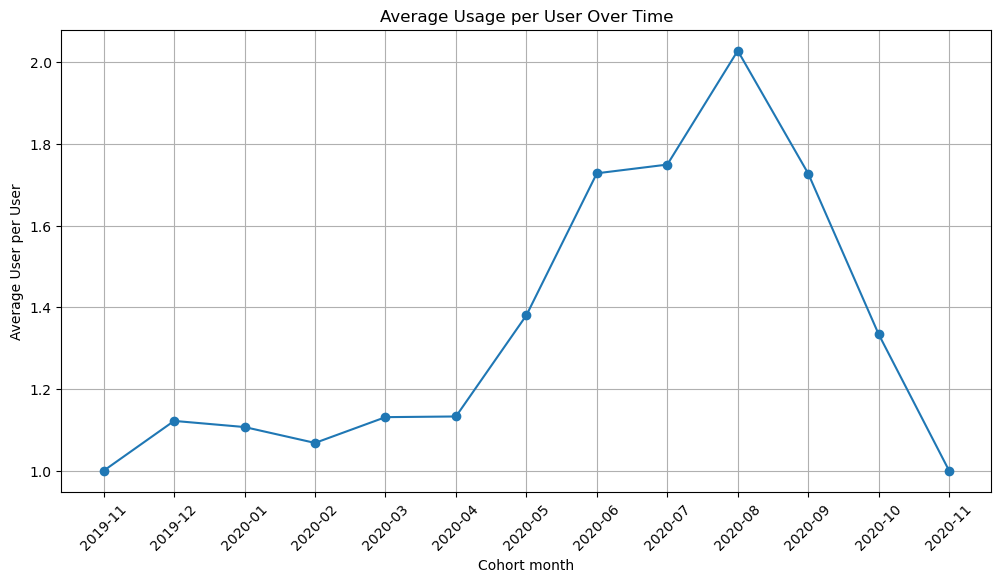

In [55]:
# 1. Frequency of service usage
plt.figure(figsize=(12, 6))
plt.plot(cohort_frequency["cohort_month"].astype(str), cohort_frequency["average_usage_per_user"], marker='o')
plt.title("Average Usage per User Over Time")
plt.xlabel("Cohort month")
plt.ylabel("Average User per User")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


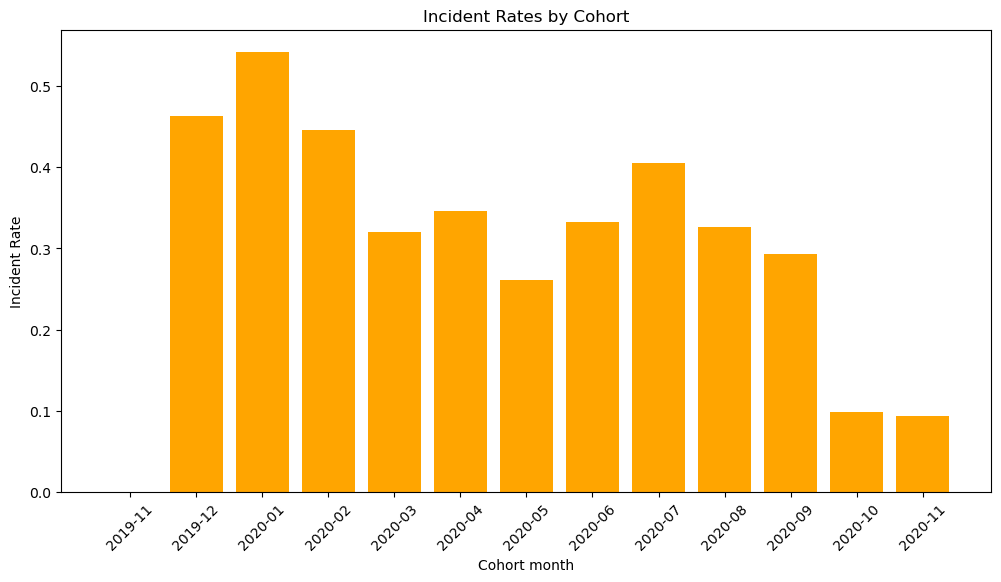

In [80]:
# 2. Incident Rates
plt.figure(figsize=(12, 6))
plt.bar(cohort_incident_rate["cohort_month"].astype(str), cohort_incident_rate["incident_rate"], color="orange")
plt.title("Incident Rates by Cohort")
plt.xlabel("Cohort month")
plt.ylabel("Incident Rate")
plt.xticks(rotation=45)
plt.show()

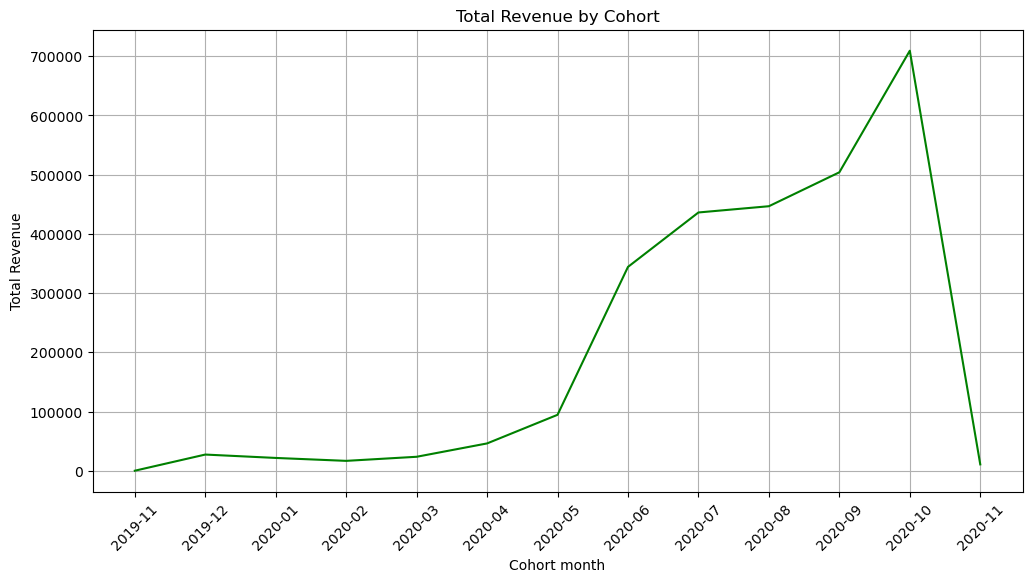

In [77]:
# 3. Revenue Generated by Cohort
plt.figure(figsize=(12, 6))
plt.plot(cohort_revenue["cohort_month"].astype(str), cohort_revenue["total_revenue"], color="green")
plt.title("Total Revenue by Cohort")
plt.xlabel("Cohort month")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

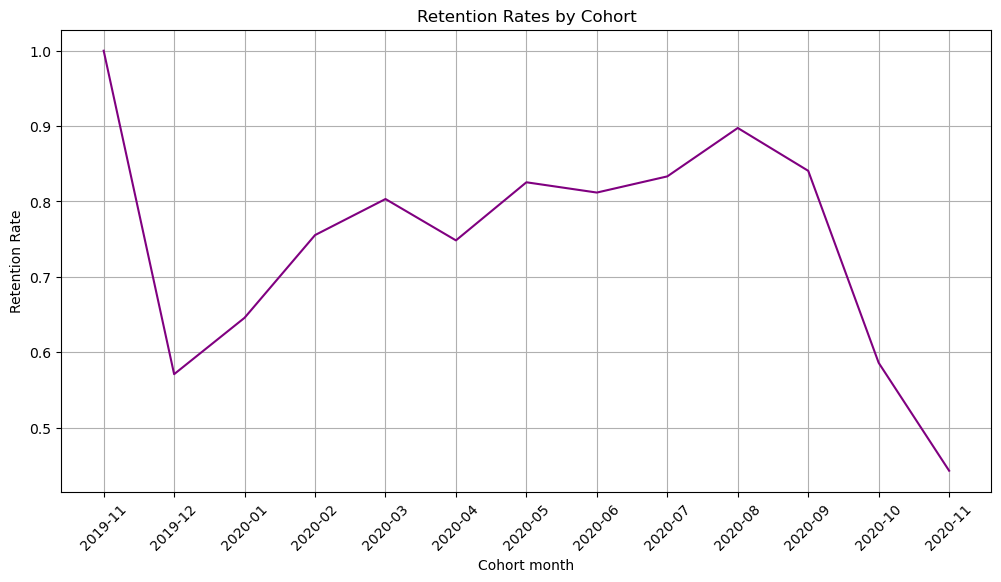

In [78]:
# 4. New Relevant Metric: Retention Rates
plt.figure(figsize=(12, 6))
plt.plot(cohort_retention["cohort_month"].astype(str), cohort_retention["retention_rate"], color="purple")
plt.title("Retention Rates by Cohort")
plt.xlabel("Cohort month")
plt.ylabel("Retention Rate")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()